# Evaluate Classifiers

In [16]:
# Packages
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Evaluation Function

Input predicted and true labels and a classifier name, output a table of the accuracy, precision, recall, f1 score, and a plot of the confusion matrix.

In [17]:
def evaluate_classifier(y_true, y_pred, classifier_name):

    # Convert labels to integers
    label_mapping = {
        'SUV': 0,
        'Sedan': 1,
        'Pickup': 2,
        'Convertible': 3
    }
    y_true_num = np.array([label_mapping[label] for label in y_true])
    y_pred_num = np.array([label_mapping[label] for label in y_pred])

    # Print the classification report
    print(f"Classification Report for {classifier_name}:")
    print(classification_report(y_true_num, y_pred_num, target_names=label_mapping.keys()))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Confusion Matrix Display
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_mapping.keys())

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm_display.plot(cmap='Blues', ax=plt.gca(), xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


## GPT-4 Vision

In [18]:
# Load data '../../Data/Predictions/GPT-4 Vision/GPT-4_Vision_Relabeled_Test_No_Blur_predictions.xlsx'
GPT_4_Vision_Relabeled_Test_No_Blur_predictions = pd.read_excel('../../Data/Predictions/GPT-4 Vision/GPT-4_Vision_Relabeled_Test_No_Blur_predictions.xlsx')
GPT_4_Vision_Relabeled_Test_No_Blur_predictions

,filename,label,New Class,Old Class,non_blurred_image_path,gpt_4_v_classification
0,Convertible_test_orig_test_00023_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
1,Convertible_test_orig_test_00096_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
2,Convertible_test_orig_test_00107_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Sedan
3,Convertible_test_orig_test_00135_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
4,Convertible_test_orig_test_00147_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
...,...,...,...,...,...,...
1484,Convertible_test_orig_test_04996_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
1485,Convertible_test_orig_test_07402_resized_no_bl...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
1486,Convertible_test_orig_train_00357_resized_no_b...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible
1487,Convertible_test_orig_train_01077_resized_no_b...,2,Convertible,Convertible,../../../Images/test/No Blur/Convertible_test_...,Convertible


Classification Report for GPT-4 Vision:
              precision    recall  f1-score   support

         SUV       0.93      1.00      0.96       441
       Sedan       0.96      0.98      0.97       580
      Pickup       0.99      0.87      0.92       189
 Convertible       0.99      0.92      0.95       279

    accuracy                           0.96      1489
   macro avg       0.97      0.94      0.95      1489
weighted avg       0.96      0.96      0.96      1489



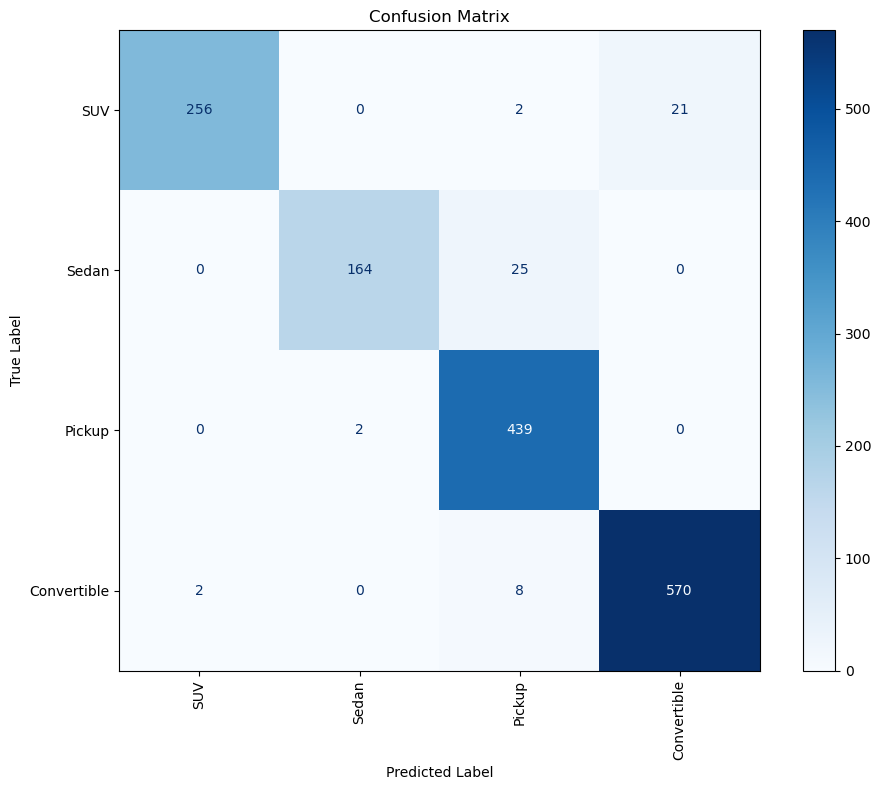

In [19]:
# Evaluate on 'New Class' and 'gpt_4_v_classification'
evaluate_classifier(GPT_4_Vision_Relabeled_Test_No_Blur_predictions['New Class'], GPT_4_Vision_Relabeled_Test_No_Blur_predictions['gpt_4_v_classification'], 'GPT-4 Vision')